# MAPPING AND TRANSFORMATION

The term *mapping* means to transform values from one domain into 'equivalent'
values in another.  Mapping is a key concept in algorithmic composition and is a central pillar of a techique called "sonification", i.e. transforming data sets into sound.

<hr style="height:1px;color:gray">

Notebook imports:

In [2]:
import sys
sys.path.append("/Users/taube/Software/musx")
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
from random import randint
from math import pi, sin
from musx import Score, Note, Seq, MidiFile, version, setmidiplayer, playfile, rescale, frange,\
keynum, hertz, between, interp, intempo, pick, rescale, uniran, lowran, midran, highran, explsegs, scale, ransegs
from musx.midi.gm import ChoirAahs, AcousticGrandPiano, Marimba, Xylophone, PizzicatoStrings
print(f"musx version: {version}")

musx version: N.N.N


This notebook generates MIDI files and automatically plays them using [fluidsynth](https://www.fluidsynth.org/download/) and the [MuseScore_General.sf3](https://ftp.osuosl.org/pub/musescore/soundfont/MuseScore_General) sound font. See [INSTALL.md](https://github.com/musx-admin/musx/blob/main/INSTALL.md) for how to install a terminal-based MIDI player to use with musx.  If you don't have a player installed you can access the output files in the same directory as this notebook:

In [ ]:
setmidiplayer("fluidsynth -iq -g1 /usr/local/sf/MuseScore_General.sf3")
print('OK!')

Setup for graphing, this assumes matplotlib is installed in your python environment:

In [7]:
def plot(data, size=(3,3)):
    plt.figure(figsize=size)
    plt.plot(data)
    plt.show()
    
def plotn(*data):
    print("DATA", data)
    fig, axes = plt.subplots(nrows=1, ncols=len(data), figsize=(5, 3))
    for i,d in enumerate(data):
        axes[i].plot(d)
    #fig.tight_layout()
    plt.show()
    
def histo(data):
    plt.hist(data, bins=20, facecolor="blue", alpha=0.5) 
    plt.show()
    
print('OK!')

OK!


## Rescaling

The `rescale()` function maps a numeric value from one range into an equivalent value in a different range:

```musx.rescale(val, oldmin, oldmax, newmin, newmax, mode='lin')```

*val* is the value to rescale, *oldmin* and *oldmax* are its original bounds; *newmin* and *newmax* are its new bounds. The *mode* parameter controls the interpolation method between *newmin* and *newmax*: 'lin' is linear interpolation.

Map 0 &rarr; 1 to 70 &rarr; 80:

DATA ([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99], [70, 70.1, 70.19999999999999, 70.3, 70.4, 70.5, 70.6, 70.69999999999999, 70.80000000000001, 70.9, 71.0, 71.10000000000001, 71.2, 71.3, 71.39999999999999, 71.5, 71.6, 71.69999999999999, 71.80000000000001, 71.9, 72.0, 72.10000000000001, 72.2, 72.3, 72.4, 72.5,

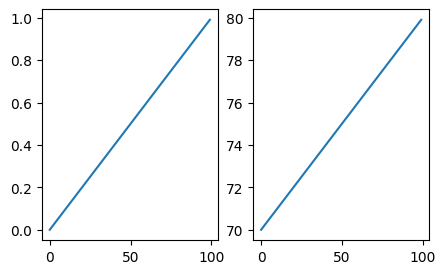

In [8]:
xdata, ydata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 70, 80)
    xdata.append(x)
    ydata.append(y)
plotn(xdata,ydata)

If *newmin* and *newmax* values are switched then rescaling will be inverted:

Map 0 &rarr; 1 to 80 &rarr; 70 (inverted):

In [ ]:
xdata, ydata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 80, 70)
    xdata.append(x)
    ydata.append(y)
plotn(xdata,ydata)

If *mode* is 'lin' then linear scaling occurs, 'cos' produces cosine
scaling, 'exp' produces exponential scaling, and '-exp' produces 
inverted exponential.

Cosine mapping 0 &rarr; 1 to 70 &rarr; 80:

In [ ]:
xdata, ydata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 70, 80, 'cos')
    xdata.append(x)
    ydata.append(y)
plotn(xdata,ydata)

Exponential mapping 0 &rarr; 1 to 70 &rarr; 80:

In [ ]:
xdata, ydata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 70, 80, 'exp')
    xdata.append(x)
    ydata.append(y)
plotn(xdata,ydata)

Flipped exponential mapping 0 &rarr; 1 to 70 &rarr; 80:

In [ ]:
xdata, bdata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 70, 80, '-exp')
    xdata.append(x)
    bdata.append(y)
plotn(xdata,bdata)

Inverted exponential mapping 0 &rarr; 1 to 80 &rarr; 70 

In [ ]:
xdata, ydata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 80, 70, '-exp')
    xdata.append(x)
    ydata.append(y)
plotn(xdata,ydata)

Mapping 0 &rarr; 1 to 0 &rarr; 2pi (sine wave):

In [ ]:
xdata, ydata = [], []
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 0, (2 * pi))
    xdata.append(x)
    ydata.append(sin(y))
plotn(xdata,ydata)

Mapping to any frequency (freq * 2pi * x):

In [ ]:
xdata, ydata = [], []
freq = randint(3, 20) 
for x in frange(0, 1, .01):
    y = rescale(x, 0, 1, 0, freq * (2 * pi))
    xdata.append(x)
    ydata.append(sin(y))
print(f'{freq} hz:')
plotn(xdata,ydata)

### Using rescale() in composition

Using `rescale()` inside a part composer is a simple but powerful way of "reinterpreting" compositional information and mapping values from one note parameter to another.

Playback setup:

In [ ]:
def playcomposer(comp, args):
    score=Score(out=Seq())
    args.insert(0, score)
    score.compose( comp(*args) )
    file=MidiFile("mapping.mid", score.out).write()
    print(f"Wrote '{file.pathname}'.")
    playfile(file.pathname)
    
print(f'playcomposer: {playcomposer}')

In [ ]:
def sine(score, length, cycs, low, hi, rhy, dur, amp):
    twopi = 2*pi
    for i in range(length):
        a = sin(twopi * cycs * (i / length))
        k = rescale(a, -1, 1, low, hi)
        m = Note(time=score.now, pitch=k, duration=dur, amplitude=amp )
        score.add(m)
        yield rhy
        
playcomposer(sine, [100, 4, 20, 100, .1, .1, .6])

print('OK!')

Add some noise to the wave for a more interesting effect:

In [ ]:
def sinx(score, length, cycs, low, hi, noise, rhy, dur, amp):
    twopi = 2 * pi
    for i in range(length):
        a = sin(twopi * cycs * (i / length))
        r = between(- noise, noise)
        k = rescale(a + r, -1 - noise, 1 + noise, low, hi)
        m = Note(time=score.now, pitch=k, duration=dur, amplitude=amp )
        score.add(m)
        yield rhy
        
#playcomposer(sinx, [100, 4, 20, 100, .2, .1, .1, .6])
#playcomposer(sinx, [100, 4, 20, 100, .5, .1, .1, .6])
playcomposer(sinx, [100, 4, 20, 100, .7, .1, .1, .6])

## Envelopes and Interpolation

In computer composition envelopes are used for many purposes, perhaps the most common use is to shape or change a sound parameter value over time. An envelope at its core is just a list of x and y value pairs, where x values are monotonically increasing and y values are the values at x.  Every x value in its coordinate system maps to a y value in its coordinate system

The `interp()` function interpolates a y value for a given x in a series of x,y coordinate pairs. If x is not within bounds then the first or last y value is returned. x y pairs can be provide as an inline series or as a list.

```interp(x, x1, y1, x2, y2, ... mode='lin', mul=None, add=None)```

```interp(x, [x1, y1, x2, y2], mode='lin', mul=None, add=None)```

A 'normalized envelope' is an envelope whose x and y coordinates are defined within the range 0 to 1. Normalized envelopes express pure proportion (shape) rather than absolute coordinates, and can be rescaled to control the evolution of multiple sound parameters

Define some normalized envelopes:

In [ ]:
rampup = [0, 0, 1, 1]
rampdown = [0, 1, 1, 0]
triangle = [0, 0, .5, 1, 1, 0]
flattop = [0, 0, .25, 1, .75, 1, 1, 0]
expdown = [0, 1, .25, 1/4, .5, 1/16, .75, 1/32, 1, 0]
expup = [0, 0, .25, 1/32, .5, 1/16, .75, 1/4, 1, 1]

print('OK!')

Example of using a normalized envelope to control pitch and amplitude:

In [ ]:
def shaper (score, length, envl, rate, amplow, amphigh, keylow, keyhigh):
    for i in range(length):
        x = i / (length - 1)
        y = interp(x, envl)
        k = rescale(y, 0, 1, keylow, keyhigh)
        a = rescale(y, 0, 1, amplow, amphigh)
        m = Note(time=score.now, duration=rate, pitch=k, amplitude=a)
        score.add(m)
        yield rescale(y, 0, 1, .1, .5)

score=Score(out=Seq())
score.compose( shaper(score, 20, flattop, .15, .9, .3, 48, 64) )
file=MidiFile("mapping.mid", score.out).write()
print(f"Wrote '{file.pathname}'.")
playfile(file.pathname)

Example of `interp()` used to control amplitude and tempo:

In [ ]:
def playinterp(q, length, rate, keyn, wid, mintem, maxtem, minamp, maxamp):
    maxx = length - 1
    mid = (.2 * length) + (uniran() * (.6 * length) )
    for x in range(length):
        a = interp(x, 0, minamp, mid, maxamp, maxx, minamp)
        c = interp(x, 0, mintem, mid, maxtem, maxx, mintem)
        k = keyn + (uniran() * wid)
        d = (rate * 1.5 * c)
        m = Note(time=q.now, pitch=k, duration=d, amplitude=a )
        score.add(m)
        yield rate * c

score = Score(out=Seq())
score.compose([ [0, playinterp(score, 60, .2, 84, 7, 1, .6, .4, .8)] ,
                [1, playinterp(score, 60, .2, 77, 7, 1, .6, .4, .8)] ,
                [2, playinterp(score, 60, .2, 70, 7, 1, .6, .4, .8)] ,
                [3, playinterp(score, 60, .2, 63, 7, 1, .6, .4, .8)] ,
                [4, playinterp(score, 60, .2, 56, 7, 1, .6, .4, .8)] , 
                [5, playinterp(score, 60, .2, 49, 7, 1, .6, .4, .8)]
              ])
  
file=MidiFile("mapping.mid", score.out).write()
print(f"Wrote '{file.pathname}'.")
playfile(file.pathname)

<!-- ## The Envelope Class

WRITE ME! -->

## Exponential scaling

`explsegs(num, sumto, base)`

The `explsegs()` function returns a series of segments that are exponentially related.
 *num* is the number of segments to generate, *sumto* is the value the segments sum to, and *base* defines the curve of the values: if *base* is greater than 1 then the values  are in increasing order, if *base* is less than 1 then values are in decreasing order:

In [ ]:
data = explsegs(8, 20, 32)
print("data sum", sum(data),":", data)
plot(data)

In [ ]:
data = explsegs(8, 20, 1/32)
print("data sum", sum(data),":", data)
plot(data)

Bouncing balls whose tempo and key numbers are controlled by a list of values produced by `explsegs()`:

In [ ]:
def ballfall(score, drops, summ, curve, keyn, amp):
    segs = explsegs(drops, summ, curve)
    big = segs[0]
    low = hertz(keyn)
    for d in segs:
        e = 2 ** (uniran() * (d / big))
        k = keynum(low * e)
        a = rescale(d, 0, big, .1, amp)
        m = Note(time=score.now, duration=d, pitch=k, amplitude=a)
        score.add(m)
        yield d
print(f"ballfall: {ballfall}")

In [ ]:
score=Score(out=Seq())
score.compose( [[0,  ballfall(score, 40, 10, 1/256, 60, .8)],
                [6,  ballfall(score, 100, 15, 1/150, 40, .8)],
                [10, ballfall(score, 40, 10, 1/256, 90, .8)]])
file=MidiFile("mapping.mid", score.out).write()
print(f"Wrote '{file.pathname}'.")
playfile(file.pathname)

## Randomized scaling

`ransegs(num, mapto, func=None)`

The ransegs function returns a series of random segments that sum to a given number.  *num* is the number of segments to generate. If *mapto* is a number then the values retuned will sum to that number, otherwise *mapto* should be a list [*min*, *max*] that the sorted random values will be scaled to.

This example uses ransegs to to mimic the start and stop of a rainstorm of pizzicato notes:

In [ ]:
def rainyday (score, length, tot, lb, scale, ch, sec):
    gamut = [lb + s for s in scale]
    limit = len(gamut)
    if sec == 'a':
        segs = ransegs(length, tot, lowran)
        segs.sort(reverse=True)
    elif sec == 'b':
        segs = ransegs(length, tot, midran)
    elif sec == 'c':
        segs = ransegs(length, tot, highran)
        segs.sort()
    for i, s in enumerate(segs):
        if i > 0:
            t = score.now
            a = interp(i, 0, .2, length, .7) * 1.5
            d = between(.1, .25)
            x = rescale(midran(), 0, 1, 0, limit)
            k = gamut[ int(x) ]
            n = Note(time=t, duration=d, pitch=k, amplitude=a, instrument=ch)
            score.add(n)
        yield s

print(f'rainyday: {rainyday}')

In [ ]:
t0 = MidiFile.metatrack(ins={i: PizzicatoStrings for i in range(4)})
t1 = Seq()
score = Score(out=t1)

s = scale(0, 6, [2, 2, 3, 2, 3])
#s = musx.scale(0, 9, [2, 1])
#s = musx.scale(0, 7, [1,3])
    
score.compose([ [0,  rainyday(score, 30, 20, 84, s, 0, 'a')],
                [0,  rainyday(score, 30, 20, 72, s, 1, 'a')],
                [0,  rainyday(score, 30, 20, 60, s, 2, 'a')],
                [0,  rainyday(score, 30, 20, 48, s, 3, 'a')],
                
                [20, rainyday(score, 70, 20, 84, s, 0, 'b')],
                [20, rainyday(score, 70, 20, 72, s, 1, 'b')],
                [20, rainyday(score, 70, 20, 60, s, 2, 'b')],
                [20, rainyday(score, 70, 20, 48, s, 3, 'b')],
                
                [40, rainyday(score, 30, 20, 84, s, 0, 'c')],
                [40, rainyday(score, 30, 20, 72, s, 1, 'c')],
                [40, rainyday(score, 30, 20, 60, s, 2, 'c')],
                [40, rainyday(score, 30, 20, 48, s, 3, 'c')]
            ])
    
f = MidiFile("mapping.mid", [t0, t1]).write()
print(f"Wrote '{file.pathname}'.")
playfile(f.pathname)